<a href="https://colab.research.google.com/github/sohenney/2025-1_CV/blob/main/HW_2_2_2021025030_%EC%9D%B4%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

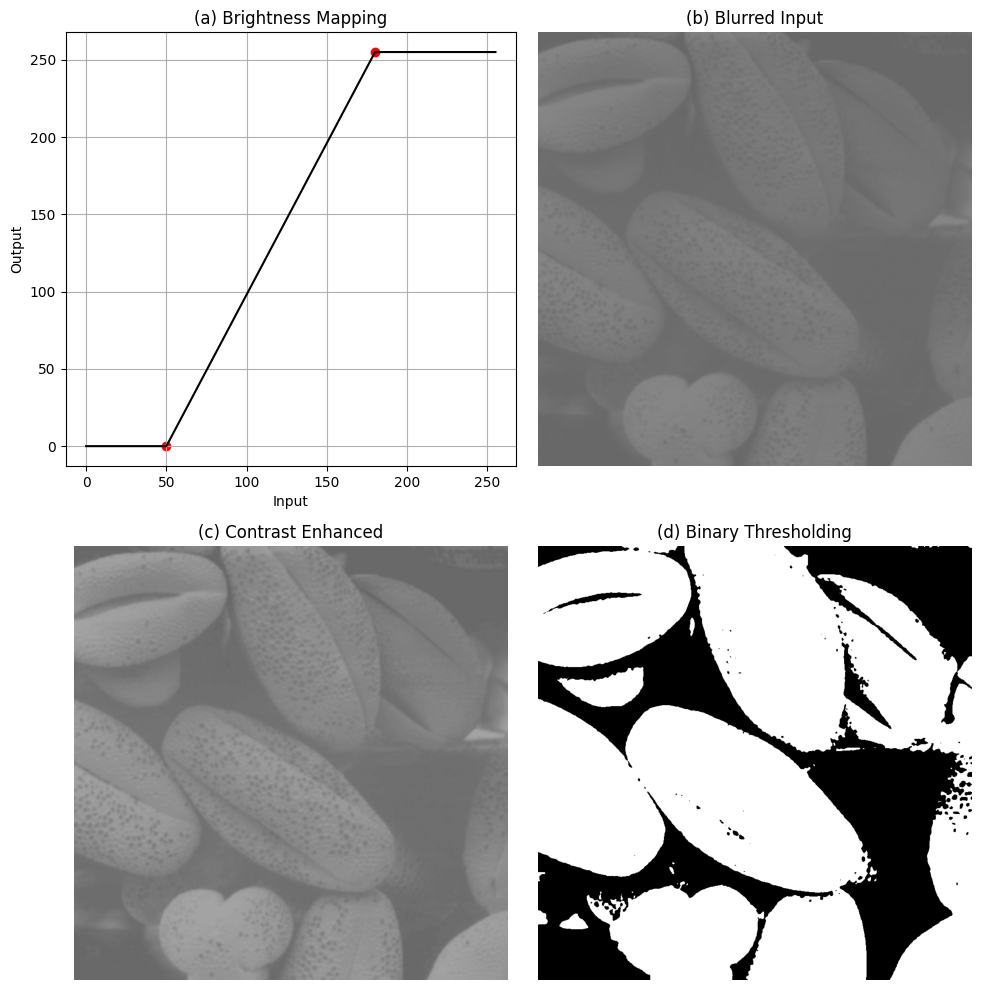

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 웹 이미지 다운로드 후 흑백 이미지로 반환
def load_grayscale_image_from_url(url):
    try:
        with urllib.request.urlopen(url, timeout=10) as response:
            data = response.read()
            img_array = np.frombuffer(data, dtype=np.uint8)
            gray_img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
            return gray_img
    except Exception as e:
        print(f"이미지 불러오기 오류: {e}")
        return None

# 선형 대비 조정 함수
def linear_contrast_adjustment(img, x1, y1, x2, y2):
    adjusted = np.zeros_like(img, dtype=np.uint8)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            pixel = img[y, x]
            if pixel < x1:
                adjusted[y, x] = (y1 / x1) * pixel
            elif pixel > x2:
                adjusted[y, x] = ((255 - y2) / (255 - x2)) * (pixel - x2) + y2
            else:
                adjusted[y, x] = ((y2 - y1) / (x2 - x1)) * (pixel - x1) + y1
    return adjusted

# 단순 임계값 기반 이진화 처리
def binarize_with_threshold(img, threshold):
    result = np.zeros_like(img, dtype=np.uint8)
    result[img > threshold] = 255
    return result

# 이미지에 흐림과 밝기 조정 적용 (주소로 불러온 원본 이미지가 교과서 자료와 달리 너무 선명하고 반듯하여 임의로 블러 조절함)
def soften_and_dull_image(img, blur_size=(9, 9), intensity=0.7, brightness=40):
    blurred = cv2.GaussianBlur(img, blur_size, 0)
    faded = cv2.convertScaleAbs(blurred, alpha=intensity, beta=brightness)
    return faded

# 이미지 주소
image_url = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif'

original = load_grayscale_image_from_url(image_url)

if original is not None:
    # 흐림 및 대비 감소 이미지 생성
    softened = soften_and_dull_image(original)

    # 밝기 보정 및 이진화를 위한 파라미터
    low_in, low_out = 50, 0
    high_in, high_out = 180, 255
    threshold_value = 120

    # 처리 단계 수행
    contrast_img = linear_contrast_adjustment(softened, low_in, low_out, high_in, high_out)
    binary_img = binarize_with_threshold(contrast_img, threshold_value)

    # 결과 시각화
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    # (a) 변환 곡선
    axes[0, 0].plot([0, low_in, high_in, 255], [0, low_out, high_out, 255], color='black')
    axes[0, 0].scatter([low_in, high_in], [low_out, high_out], color='red')
    axes[0, 0].set_title('(a) Brightness Mapping')
    axes[0, 0].set_xlabel('Input')
    axes[0, 0].set_ylabel('Output')
    axes[0, 0].grid(True)

    # (b) 흐릿한 이미지
    axes[0, 1].imshow(softened, cmap='gray', vmin=0, vmax=255)
    axes[0, 1].set_title('(b) Blurred Input')
    axes[0, 1].axis('off')

    # (c) 명암 조정 결과
    axes[1, 0].imshow(contrast_img, cmap='gray', vmin=0, vmax=255)
    axes[1, 0].set_title('(c) Contrast Enhanced')
    axes[1, 0].axis('off')

    # (d) 이진화 결과
    axes[1, 1].imshow(binary_img, cmap='gray', vmin=0, vmax=255)
    axes[1, 1].set_title('(d) Binary Thresholding')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("이미지를 가져오는 데 실패했습니다.")


# ### 결과 분석 ###
# 영상의 명암이 뚜렷하지 않은 상태에서는 시각적 파악이 어려워 영상 전처리가 필수적임
#
# (a) Brightness Mapping:
# 명암 보정 곡선에서는 입력과 출력 밝기 사이의 비선형적 관계가 시각화됨.
# 중간 밝기 구간에서는 선형 확대가 적용되며 극단적인 밝기 영역은 확대 혹은 압축되어 대비가 강조됨.
#
# (b) Blurred Input:
# 원본 영상은 밝기가 퍼져 있는 상태이며 객체와 배경 간의 구분이 흐릿하게 나타남.
# 이는 실제 객체 경계 탐지에 불리한 조건을 만듦.
#
# (c) Contrast Enhanced:
# 명암 조정을 통해 영상의 전반적인 대비가 향상되었고 그에 따라 경계나 구조적 패턴이 보다 명확해짐.
# 특히 중간 밝기 영역이 확장되어 객체의 형태가 눈에 띄게 확실해짐.
#
# (d) Binary Thresholding:
# 보정된 영상을 기준으로 특정 임계값을 설정하여 이진화를 수행함.
# 객체와 배경이 분명하게 이후의 객체 탐지나 분할 알고리즘에 효과적으로 활용될 수 있음.
#
# 결론적으로 흐릿한 입력 영상에 대해 단계적인 전처리를 통해 식별성과 해석력을 높일 수 있었으며 이는 영상 기반 자동화 처리에서 중요한 기반 기술이 됨.
